In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

В этом проекте попробуем подсчитать вероятность успешного прохождения кампании на Kickstarter. 
Kickstarter - сервис для краундфандинга (сбора пожертвований для реализации проекта). 
Успешное прохождение - результат сборов на проект превосходит необходимое количество.

Загружаем данные проектов с Kickstarter.
Нужные нам загружаемые столбцы данных:
Название проекта
Подкатегория
Категория
Цель (количество нужных средств)
Количество собранных средств
Состояние проекта (успешно, неуспешно, отменено, заблокировано, не определено)
Количество возвратов средств
Страна

In [2]:
data = pd.read_csv('light.csv', sep=',', usecols=[1,2,3,6,8,9,10,11])

In [3]:
data

,name,category,main_category,goal,pledged,state,backers,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,1000,0,failed,0,GB
1,Where is Hank?,Narrative Film,Film & Video,45000,220,failed,3,US
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5000,1,failed,1,US
3,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,19500,1283,canceled,14,US
4,Monarch Espresso Bar,Restaurants,Food,50000,52375,successful,224,US
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,1000,1205,successful,16,US
6,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,25000,453,failed,40,US
7,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,125000,8233,canceled,58,US
8,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,65000,6240.57,canceled,43,US
9,Of Jesus and Madmen,Nonfiction,Publishing,2500,0,failed,0,CA


Отображаем параметры

In [4]:
print(data.shape) # размерность данных
print(data.columns) # столбцы
print(data.head(n=5)) # первые N строк

(59852, 8)
Index([u'name ', u'category ', u'main_category ', u'goal ', u'pledged ',
       u'state ', u'backers ', u'country '],
      dtype='object')
                                               name        category   \
0                    The Songs of Adelaide & Abullah          Poetry   
1                                     Where is Hank?  Narrative Film   
2  ToshiCapital Rekordz Needs Help to Complete Album           Music   
3  Community Film Project: The Art of Neighborhoo...    Film & Video   
4                               Monarch Espresso Bar     Restaurants   

  main_category   goal  pledged       state  backers  country   
0     Publishing   1000        0      failed        0       GB  
1   Film & Video  45000      220      failed        3       US  
2          Music   5000        1      failed        1       US  
3   Film & Video  19500     1283    canceled       14       US  
4           Food  50000    52375  successful      224       US  


Преобразуем данные к нужному нам виду:
Убираем лишние пробелы в названиях столбцов, заменяем состояния проектов на константы, отбрасываем небольшое количество значений (около 5), превосходящих остальные значения в десятки раз для красивого отображения графиков.
Также подсчитываем количество отмененных/заблокированных проектов.

In [5]:
# лишние пробелы
data.columns = data.columns.str.replace(' ', '')

# замена состояний проектов на константы
data['state'] = data['state'].replace(
    {'failed': '0', 'canceled': '1', 'successful': '2',
    'undefined': '3', 'live': '4', 'suspended': '5'})
data['state'] = pd.to_numeric(data['state'], errors='coerce')
# количество отмененных проектов
canceled_count = 0;
# меняем непонятные значения на undefined
for i in range(len(data['state'])):
    if data['state'].at[i] > 5:
        data['state'].at[i] = 3
    if data['state'].at[i] in [1, 3, 4, 5]:
        canceled_count += 1
print(canceled_count, len(data['state']))
# ~0,129, что довольно близко к ошибке в методе k соседей (0,14)
        
# данные загрузились в виде строк, преобразуем в циферки
data['goal'] = pd.to_numeric(data['goal'], errors='coerce')
data['goal'] /= 1000
for i in range(len(data['goal'])):
    if data['goal'].at[i] > 10000:
        data['goal'].at[i] = 10000

data['pledged'] = pd.to_numeric(data['pledged'], errors='coerce')
data['pledged'] /= 1000
for i in range(len(data['pledged'])):
    if data['pledged'].at[i] > 10000:
        data['pledged'].at[i] = 10000
        
data['backers'] = pd.to_numeric(data['backers'], errors='coerce')
print(data.columns)
print(data.dtypes)

(7729, 59852)
Index([u'name', u'category', u'main_category', u'goal', u'pledged', u'state',
       u'backers', u'country'],
      dtype='object')
name              object
category          object
main_category     object
goal             float64
pledged          float64
state            float64
backers          float64
country           object
dtype: object


Выводим на экран названия проектов

In [6]:
data['name']

0                          The Songs of Adelaide & Abullah
1                                           Where is Hank?
2        ToshiCapital Rekordz Needs Help to Complete Album
3        Community Film Project: The Art of Neighborhoo...
4                                     Monarch Espresso Bar
5        Support Solar Roasted Coffee & Green Energy!  ...
6        Chaser Strips. Our Strips make Shots their B*tch!
7        SPIN - Premium Retractable In-Ear Headphones w...
8        STUDIO IN THE SKY - A Documentary Feature Film...
9                                      Of Jesus and Madmen
10                                        Lisa Lim New CD!
11                                      The Cottage Market
12       G-Spot Place for Gamers to connect with eachot...
13                                          Survival Rings
14                                               The Beard
15                        Notes From London: Above & Below
16                     Mike Corey's Darkness & Light Alb

Выводим на экран статистику столбцов (среднее значение, дисперсия, минимум и максимум)

In [7]:
data.describe()

,goal,pledged,state,backers
count,59746.000000,59748.000000,59850.000000,59748.000000
mean,31.106932,8.992102,0.921721,102.479765
std,254.277692,81.123064,1.058185,811.401048
min,0.001000,0.000000,0.000000,0.000000
25%,2.000000,0.030000,0.000000,2.000000
50%,5.000000,0.624000,0.000000,12.000000
75%,15.000000,4.007000,2.000000,56.000000
max,10000.000000,8596.474580,5.000000,85581.000000


Матрица рассеивания

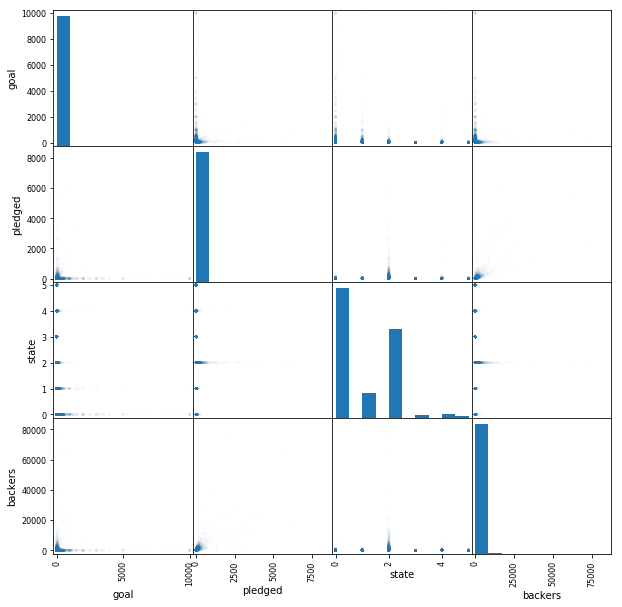

In [8]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(data, alpha=0.01, figsize=(10,10))
plt.show()

Подсчет корелляции данных

In [9]:
data.corr()

,goal,pledged,state,backers
goal,1.000000,0.036136,-0.045393,0.022392
pledged,0.036136,1.000000,0.099682,0.732570
state,-0.045393,0.099682,1.000000,0.110575
backers,0.022392,0.732570,0.110575,1.000000


Двумерный график, по оси Х - цель, по оси Y - количество собранных средств

Text(0.5,1,'Goal Pledged')

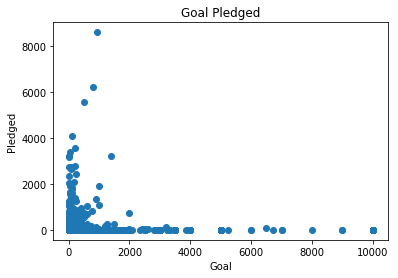

In [10]:
plt.plot(data['goal'], data['pledged'], 'o')
plt.xlabel('Goal')
plt.ylabel('Pledged')
plt.title('Goal Pledged')

Статистика столбцов с содержимым типа float

In [11]:
data.describe(include='float')

,goal,pledged,state,backers
count,59746.000000,59748.000000,59850.000000,59748.000000
mean,31.106932,8.992102,0.921721,102.479765
std,254.277692,81.123064,1.058185,811.401048
min,0.001000,0.000000,0.000000,0.000000
25%,2.000000,0.030000,0.000000,2.000000
50%,5.000000,0.624000,0.000000,12.000000
75%,15.000000,4.007000,2.000000,56.000000
max,10000.000000,8596.474580,5.000000,85581.000000


Отбрасываем ненужный столбец country

In [12]:
data = data.drop('country', axis=1)
data.head()

,name,category,main_category,goal,pledged,state,backers
0,The Songs of Adelaide & Abullah,Poetry,Publishing,1.0,0.000,0.0,0.0
1,Where is Hank?,Narrative Film,Film & Video,45.0,0.220,0.0,3.0
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,5.0,0.001,0.0,1.0
3,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,19.5,1.283,1.0,14.0
4,Monarch Espresso Bar,Restaurants,Food,50.0,52.375,2.0,224.0


Составим два отдельных списка для числовых и не числовых данных.

In [13]:
cat_cols = []
num_cols = []
for col in data.columns:
    if(data[col].dtype=='object'):
        cat_cols.append(col)
    else:
        num_cols.append(col)
num_cols.remove('state')
cat_cols.append('state')
print(cat_cols)
print(num_cols)

['name', 'category', 'main_category', 'state']
['goal', 'pledged', 'backers']


Отобразим уникальные значения категорий (то есть их список):

In [14]:
print(data['main_category'].unique())

['Publishing' 'Film & Video' 'Music' 'Food' 'Design' 'Crafts' 'Games'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism' 'Metal' 'Cookbooks' 'Web' 'Shorts' 'Plays' 'Hardware'
 'Playing Cards' 'World Music' 'Mobile Games' 'Camera Equipment'
 'Classical Music' 'Conceptual Art' 'Nonfiction' 'Product Design'
 'Documentary' 'Video Games' ' 50 Years in the Making' 'Country & Folk'
 'Mixed Media' 'Comic Books' ' Retro Gaming art.' 'Places' 'Events'
 'Fiction' 'Tabletop Games' 'Video' 'Performance Art' 'Small Batch'
 "Children's Books" 'Poetry' 'Public Art' 'Art Books' 'Drama' 'Apparel'
 'Sculpture' 'DIY' 'Hip-Hop' 'Accessories' 'People' 'Webseries'
 'Interactive Design' 'Periodicals' 'Vegan' 'Indie Rock']


Медианные значения данных:

In [15]:
data.median()

goal        5.000
pledged     0.624
state       0.000
backers    12.000
dtype: float64

Заполним медианными значениями отсутствующие поля:

In [16]:
data = data.fillna(data.median())
data[num_cols].count()

goal       59852
pledged    59852
backers    59852
dtype: int64

Отдельно сохраним и выведем числовые данные:

In [17]:
data_num = data[num_cols]
data_num.describe()

,goal,pledged,backers
count,59852.000000,59852.000000,59852.000000
mean,31.060695,8.977562,102.322546
std,254.054792,81.053300,810.704534
min,0.001000,0.000000,0.000000
25%,2.000000,0.030000,2.000000
50%,5.000000,0.624000,12.000000
75%,15.000000,4.000000,55.000000
max,10000.000000,8596.474580,85581.000000


Нормализуем числовые данные:

In [18]:
data_num = (data_num - data_num.mean()) / data_num.std()
data_num.describe()

,goal,pledged,backers
count,5.985200e+04,5.985200e+04,5.985200e+04
mean,-1.495848e-15,-1.286553e-15,-1.965671e-16
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.222559e-01,-1.107612e-01,-1.262143e-01
25%,-1.143875e-01,-1.103911e-01,-1.237474e-01
50%,-1.025790e-01,-1.030626e-01,-1.114124e-01
75%,-6.321745e-02,-6.141097e-02,-5.837212e-02
max,3.923933e+01,1.059488e+02,1.054375e+02


Векторизация:

In [19]:
data_cats = pd.get_dummies(data["main_category"])
data_cats.describe()

,50 Years in the Making,Retro Gaming art.,Accessories,Apparel,Art,Art Books,Camera Equipment,Children's Books,Classical Music,Comic Books,...,Small Batch,Tabletop Games,Technology,Theater,Vegan,Video,Video Games,Web,Webseries,World Music
count,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000,...,59852.000000,59852.00000,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000,59852.000000
mean,0.000017,0.000017,0.000017,0.000017,0.073916,0.000033,0.000017,0.000033,0.000033,0.000017,...,0.000033,0.00005,0.081351,0.030692,0.000017,0.000017,0.000084,0.000017,0.000017,0.000017
std,0.004088,0.004088,0.004088,0.004088,0.261636,0.005781,0.004088,0.005781,0.005781,0.004088,...,0.005781,0.00708,0.273375,0.172484,0.004088,0.004088,0.009140,0.004088,0.004088,0.004088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Соберем новую таблицу данных, содержащую только числовые значения (категории, цель, собранные средства, возвраты, состояние):

In [20]:
data = pd.concat((data_cats, data_num, data['state']), axis=1)
data

,50 Years in the Making,Retro Gaming art.,Accessories,Apparel,Art,Art Books,Camera Equipment,Children's Books,Classical Music,Comic Books,...,Vegan,Video,Video Games,Web,Webseries,World Music,goal,pledged,backers,state
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.118324,-0.110761,-0.126214,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.054867,-0.108047,-0.122514,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.102579,-0.110749,-0.124981,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.045505,-0.094932,-0.108945,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.074548,0.535419,0.150089,2.0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.118324,-0.095894,-0.106478,2.0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.023856,-0.105172,-0.076875,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.369760,-0.009186,-0.054672,1.0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.133590,-0.033768,-0.073174,1.0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.112419,-0.110761,-0.126214,0.0


Text(0.5,1,'Goal Pledged')

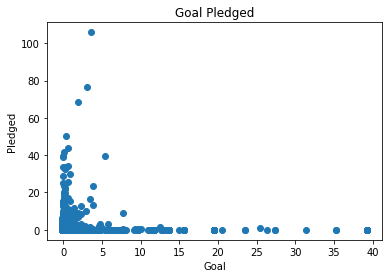

In [21]:
plt.plot(data['goal'], data['pledged'], 'o')
plt.xlabel('Goal')
plt.ylabel('Pledged')
plt.title('Goal Pledged')

Создадим две выборки данных (в одной выборке - состояние проектов, в другой все остальное):

In [22]:
X = data.drop(('state'), axis = 1)
Y = data['state']
names = X.columns
names
print(X.shape)
print(Y.shape)

(59852, 62)
(59852L,)


Разделим выборки на выборки для тестирования и обучения:

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

(44889, 14963)


# K ближайших соседей

Заполним данными метод ближайших соседей:

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

Проверим ошибки на тестовой и тренировочной выборках:

In [25]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(Y_train != y_train_predict)
err_test = np.mean(Y_test != y_test_predict)

print(err_train, err_test)

(0.14074717636837533, 0.14950210519280893)


Попробуем уменьшить ошибки подбором параметров количества осседей:

In [26]:
arrK = [1, 3, 6, 10, 15, 25, 50, 100, 1000]
train_results = []
test_results = []
for k in arrK:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    y_train_predict = knn.predict(X_train)
    y_test_predict = knn.predict(X_test)
    err_train = np.mean(Y_train != y_train_predict)
    err_test = np.mean(Y_test != y_test_predict)
    print(err_train, err_test)
    train_results.append(err_train)
    test_results.append(err_test)

(0.0526409588095079, 0.21125442758805052)
(0.12094276994363876, 0.16427187061418164)
(0.13283878010202946, 0.14943527367506515)
(0.14074717636837533, 0.14950210519280893)
(0.1449130076410702, 0.15177437679609704)
(0.15119517030898438, 0.15531644723651675)
(0.16137583817861836, 0.1626679141883312)
(0.17186838646438993, 0.17135601149502105)
(0.24919245249392946, 0.24654146895676002)


Отобразим результаты на графике:

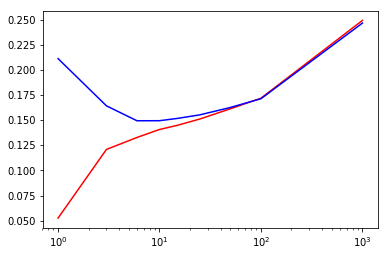

In [27]:
axes = plt.gca()
axes.set_xscale('log', basex=10) # мастшабирование по х для наглядности
plt.plot(arrK, train_results, color='r')
plt.plot(arrK, test_results, color='b')

Найдем и выведем минимальную ошибку и оптимальный параметр K:

In [28]:
min_index = 0;
min_error = 1;
for i in range(len(arrK)):
    if(test_results[i] < min_error):
        min_index = i
        min_error = test_results[i]
print('Min error: ', test_results[min_index])
print('Top K: ', arrK[min_index])

('Min error: ', 0.14943527367506515)
('Top K: ', 6)


# Нейронные сети

In [29]:
from sklearn.neural_network import MLPClassifier
arr_alpha = np.logspace(-3, 1, 20)
arr_train_err = []
arr_test_err = []
for a in arr_alpha:
    layers = (100,)
    mlp_model = MLPClassifier(alpha = a, hidden_layer_sizes = layers, solver = 'lbfgs', activation = 'logistic')
    mlp_model.fit(X_train, Y_train)
    y_train_predict = mlp_model.predict(X_train)
    y_test_predict = mlp_model.predict(X_test)
    err_train = np.mean(Y_train != y_train_predict)
    err_test = np.mean(Y_test != y_test_predict)
    arr_train_err.append(err_train)
    arr_test_err.append(err_test)


(0.001, 10.0)

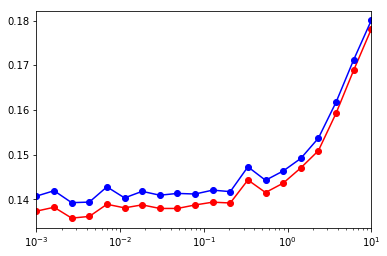

In [30]:
plt.semilogx(arr_alpha, arr_train_err, 'r-o')
plt.semilogx(arr_alpha, arr_test_err, 'b-o')
plt.xlim([np.min(arr_alpha), np.max(arr_alpha)])

In [31]:
min_test_err = 1
min_index = 0
for i in range(len(arr_test_err)):
    if arr_test_err[i] < min_test_err:
        min_test_err = arr_test_err[i]
        min_index = i
print('Min alpha: ', arr_alpha[min_index])
print('Min error: ', arr_test_err[min_index])

('Min alpha: ', 0.0026366508987303583)
('Min error: ', 0.13927688297801244)


In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_test_predict))

             precision    recall  f1-score   support

        0.0       0.76      0.97      0.86      7723
        1.0       0.00      0.00      0.00      1498
        2.0       0.93      0.90      0.91      5280
        3.0       0.00      0.00      0.00       180
        4.0       0.00      0.00      0.00       204
        5.0       0.00      0.00      0.00        78

avg / total       0.72      0.82      0.76     14963



C:\Users\Stanislav\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# РСА

Метод главных компонент (principal component analysis) служит для сокращения размерности пространства признаков.

In [33]:
from sklearn import decomposition

In [34]:
test_errors = []
train_errors = []
max_params_count = len(data.columns) / 3 # максимальное количество компонент
for i in range(1, max_params_count):
    pca = decomposition.PCA(n_components = i)
    X_train_r = pca.fit_transform(X_train)
    X_test_r = pca.transform(X_test)
    # применим метод K ближайших соседей
    knn = KNeighborsClassifier(n_neighbors = 10)
    knn.fit(X_train_r, Y_train)
    err_train = np.mean(Y_train != knn.predict(X_train_r))
    err_test = np.mean(Y_test != knn.predict(X_test_r))
    train_errors.append(err_train)
    test_errors.append(err_test)

Изобразим график

Text(0,0.5,'Errors')

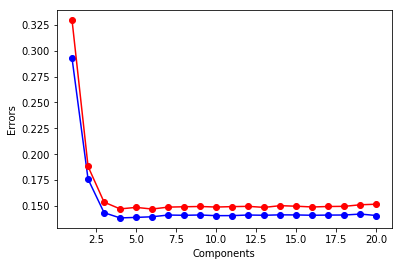

In [35]:
plt.plot(list(range(1, max_params_count)), train_errors, 'b-o')
plt.plot(list(range(1, max_params_count)), test_errors, 'r-o')
plt.xlabel('Components')
plt.ylabel('Errors')

При увеличении более чем на 4 компоненты ошибка практически не изменяется (что соответствует изначальному количеству числовых столбцов в нашей таблице данных). Следовательно, наблюдаем сильное переобучение.

Отобразим минимальные значения ошибок и оптимальное количество компонент:

In [36]:
print('Min train error: ' + str(np.min(train_errors)))
print('Min test error: ' + str(np.min(test_errors)))
print('Optimal component count: ' + str(train_errors.index(np.min(train_errors)) + 1))

Min train error: 0.1383857960747622
Min test error: 0.14696250751854575
Optimal component count: 4
